## Exploratory data analysis of Active_CC_Contributions.csv

In [27]:
 import pandas as pd

# Provide the file path
file_path = 'Active_CC_Contributions.csv'

df = pd.read_csv(file_path)
df.head()


,Date,Contributor,Address,City,State,Zip,Occupation,Employer,Principal Officer,Amount,CPF ID,Recipient,Tender Type ID,Tender Type Description,Record Type ID,Record Type Description,Source Description,Datetime,UUID
0,3/16/2010,"ADAMSON, PAUL",17 LANDGRENE ST,SQUANTUM,MA,02171-1307,REAL ESTATE DEVELOPER,SELF EMPLOYED,NaN,250.0,12892,"Flaherty Jr., Michael F.",1,Check,201,Individual,3/16/10 Deposit Report,2010-03-16,45588528-6600-592a-85ce-1139efb5452e
1,3/16/2010,"BELMONT, NANCY",294 ELMWOOD AVE,WOLLASTON,MA,02170,NaN,NaN,NaN,50.0,12892,"Flaherty Jr., Michael F.",1,Check,201,Individual,3/16/10 Deposit Report,2010-03-16,9d02198b-1339-533a-9640-83d6f70ef358
2,3/16/2010,"BELMONT, WINIFRED",294 ELMWOOD AVE,WOLLASTON,MA,02170,NaN,NaN,NaN,50.0,12892,"Flaherty Jr., Michael F.",1,Check,201,Individual,3/16/10 Deposit Report,2010-03-16,65d0339d-a861-5e26-be7f-db352411778a
3,3/16/2010,"BERNINGER, MARY",156 SAINT ANDREW RD,BOSTON,MA,021281253,NaN,NaN,NaN,25.0,12892,"Flaherty Jr., Michael F.",1,Check,201,Individual,3/16/10 Deposit Report,2010-03-16,561dfe74-3b45-51c8-9272-265c0cba8b14
4,3/16/2010,"BOYLE, ANNA",437 E 5TH ST,BOSTON,MA,021273044,NaN,NaN,NaN,25.0,12892,"Flaherty Jr., Michael F.",1,Check,201,Individual,3/16/10 Deposit Report,2010-03-16,98fff281-960f-51cf-be82-53a5c5b68da3


#### Finding the top 20 Contributors

In [28]:
# Group by the "Contributor" column and calculate the sum of the "Amount" column
contributor_totals = df.groupby("Contributor")["Amount"].sum().reset_index()
contributor_totals = contributor_totals.sort_values(by="Amount", ascending=False)

# Print the top 20 contributors
top_20_contributors = contributor_totals.head(20)
print(top_20_contributors)


                                             Contributor     Amount
143                       Aggregated Unitemized Receipts  147763.85
12135                                    Murray, Georgia   25500.00
9572                                        Lee, Barbara   22350.00
1071                                     Benson, Deborah   21700.00
54                                         Aberly, Naomi   20550.00
5820                               Flynn, Edward Michael   20000.00
1878                                      Burnes, Nonnie   12737.00
1462                           Boston Teachers Union PAC   12500.00
7174                                      Hanley, Joseph   12050.00
1448    Boston Police Patrolmens Assoc. Pol Action Comm.   12000.00
9737                                       Leung, Edward   11250.00
10202  MA & Northern NE Laborers' District Council Po...   11250.00
10549                                      Maloney, Mark   11000.00
9753                                    Levenson

#### The total amount each recipient recieved

In [29]:
# Sort the DataFrame by the total amount in descending order
recipient_totals = df.groupby("Recipient")["Amount"].sum().reset_index()
recipient_totals = recipient_totals.sort_values(by="Amount", ascending=False)

print(recipient_totals)

                   Recipient      Amount
7   Flaherty Jr., Michael F.  1808742.76
14              Wu, Michelle  1486452.16
4       Campbell, Andrea Joy   897720.68
13      O'Malley, Matthew J.   692661.37
9      Flynn, Edward Michael   686292.89
1               Baker, Frank   684131.47
5             Edwards, Lydia   554057.77
6    Essaibi George, Annissa   367026.41
10           George, Annissa   296705.87
11                Janey, Kim   249827.23
2   Bok, Priscilla MacKenzie   205397.47
12           Mejia, Julia M.   152378.26
0         Arroyo, Ricardo N.   138424.77
3      Breadon, Elizabeth A.    36725.10
8       Flaherty, Michael F.    10102.07


#### Getting the top contributors to Flaherty Jr., Michael F.

In [30]:

# Filter the DataFrame for contributions to the recipient 'Flaherty Jr., Michael F.'
recipient_name = 'Flaherty Jr., Michael F.'
recipient_contributions = df[df['Recipient'] == recipient_name]

# Group by the "Contributor" column and calculate the sum of the "Amount" column
contributor_totals = recipient_contributions.groupby("Contributor")["Amount"].sum().reset_index()
contributor_totals = contributor_totals.sort_values(by="Amount", ascending=False)

# Print the top 5 contributors and their corresponding amounts
top_5_contributors = contributor_totals.head(5)
print(top_5_contributors)


                   Contributor  Amount
376      Brooks Jr., William E  5000.0
1555       Fitzpatrick, Neil F  4500.0
2998  McLaughlin Jr., Brian J.  4250.0
2352          Keliher, James E  4250.0
3707          Raftery, David L  3700.0


#### Contributions made to Flaherty Jr., Michael F. grouped by year

   Year  Contribution Count
0  2013                1264
1  2015                1055
2  2019                 994
3  2011                 950
4  2017                 938
5  2018                 614
6  2014                 612
7  2016                 526
8  2010                 168


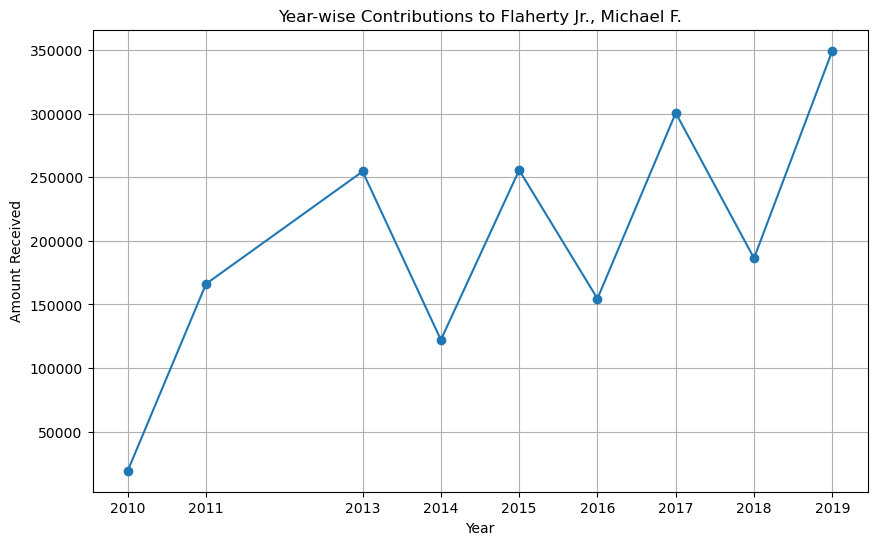

In [31]:

# Convert the 'Datetime' column to a datetime data type
df['Datetime'] = pd.to_datetime(df['Datetime'])
# Create a new 'year' column
df['year'] = df['Datetime'].dt.year

# Filter the DataFrame for contributions to the recipient 'Flaherty Jr., Michael F.'
recipient_name = 'Flaherty Jr., Michael F.'
recipient_contributions = df[df['Recipient'] == recipient_name]

# Group by the 'year' column and calculate the sum of the 'Amount' column
yearly_totals = recipient_contributions.groupby('year')['Amount'].sum().reset_index()

# Print a line chart of the amount received each year
plt.figure(figsize=(10, 6))
plt.plot(yearly_totals['year'], yearly_totals['Amount'], marker='o', linestyle='-')
plt.title(f'Year-wise Contributions to {recipient_name}')
plt.xlabel('Year')
plt.ylabel('Amount Received')
plt.grid(True)
plt.xticks(yearly_totals['year'])

# Count and print the number of contributions received that year
yearly_counts = recipient_contributions['year'].value_counts().reset_index()
yearly_counts.columns = ['Year', 'Contribution Count']
print(yearly_counts)

plt.show()


#### Finding the City from which Flaherty Jr., Michael F. recieved most of his contributions

In [32]:

# Filter the DataFrame for contributions to the recipient 'Flaherty Jr., Michael F.'
recipient_name = 'Flaherty Jr., Michael F.'
recipient_contributions = df[df['Recipient'] == recipient_name]
recipient_contributions['City'] = recipient_contributions['City'].str.lower()

# Group by the 'City' column and count the number of contributions
city_counts = recipient_contributions['City'].value_counts().reset_index()
city_counts.columns = ['City', 'Contribution Count']

# Print the top 10 cities
top_10_cities = city_counts.head(10)
print(top_10_cities)


           City  Contribution Count
0        boston                2952
1  south boston                 419
2    dorchester                 231
3        quincy                 210
4        milton                 207
5     braintree                 147
6       hingham                 115
7  west roxbury                 105
8   east boston                  89
9        newton                  87


/var/folders/ry/qqr3x9d55rb8tlz6m6vx0jmc0000gn/T/ipykernel_28183/2089395051.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipient_contributions['City'] = recipient_contributions['City'].str.lower()


## Exploratory data analysis of Active_Police_CC_Contributions.csv

In [33]:
 import pandas as pd

# Provide the file path
file_path = 'Active_Police_CC_Contributions.csv'

df = pd.read_csv(file_path)
df.head()


,Address,Amount,CPF ID,City,Contributor,Date,Datetime,Employer,Occupation,Principal Officer,Recipient,Record Type Description,Record Type ID,Source Description,State,Tender Type Description,Tender Type ID,UUID,Zip
0,19 BOUTWELL ST 2,100.0,12892,BOSTON,"STUDLEY, JOHN",5/28/2010,2010-05-28,CITY OF BOSTON,POLICE OFFICER,NaN,"Flaherty Jr., Michael F.",Individual,201,5/28/10 Deposit Report,MA,Check,1,77f5362d-d687-54ee-8380-ea1d484a8e31,021222513
1,19 BOUTWELL ST 2,500.0,12892,BOSTON,"STUDLEY, JOHN M",5/27/2011,2011-05-27,CITY OF BOSTON,POLICE OFFICER,NaN,"Flaherty Jr., Michael F.",Individual,201,5/27/11 Deposit Report,MA,Check,1,69c16ebd-a735-54a7-880a-d84fda023b64,021222513
2,431 E 6TH ST,100.0,12892,BOSTON,"LOAN, JR, JOHN FRANCIS",8/3/2011,2011-08-03,CITY OF BOSTON,POLICE OFFICER,NaN,"Flaherty Jr., Michael F.",Individual,201,8/3/11 Deposit Report,MA,Check,1,87ba4053-f4e3-5f41-812c-1eca7dd8aa38,021273056
3,664 EAST 7TH STREET 3,500.0,12892,BOSTON,"PAROLIN, MAUREEN E",8/24/2011,2011-08-24,CITY OF BOSTON,POLICE OFFICER,NaN,"Flaherty Jr., Michael F.",Individual,201,8/24/11 Deposit Report,MA,Check,1,818cc687-7d91-5e66-bda6-fc356104b896,02127
4,48 COOLIDGE RD,200.0,12892,MILTON,"WALL, JR, LEONARD F",9/23/2011,2011-09-23,CITY OF BOSTON,POLICE OFFICER,NaN,"Flaherty Jr., Michael F.",Individual,201,9/23/11 Deposit Report,MA,Check,1,e44b48b6-7489-5bbf-aad6-7ae5ae1c283c,021863935


#### Finding the top 20 Police contributors

In [35]:
# Group by the "Contributor" column and calculate the sum of the "Amount" column
contributor_totals = df.groupby("Contributor")["Amount"].sum().reset_index()
contributor_totals = contributor_totals.sort_values(by="Amount", ascending=False)

# Print the top 20 contributors
top_20_contributors = contributor_totals.head(20)
print(top_20_contributors)


                Contributor  Amount
4             Barrett, Dana  6000.0
73        Driscoll, Richard  2950.0
190         Medina, Richard  2750.0
259         Tompkins, Steve  2625.0
118          Hosein, Haseeb  2500.0
260        Tompkins, Steven  2200.0
23        Brooks, Martin J.  2050.0
0            Amorello, Mark  1850.0
200     Murphy, Dennis Jude  1800.0
95    Giardina Jr., James V  1700.0
66             Dineen, John  1650.0
104            Grice, Elton  1500.0
37            Coakley, Neva  1500.0
26        Burke, Terrence S  1499.0
22           Brooks, Martin  1386.0
97    Giardina Sr., James V  1350.0
169          Mahoney, Brian  1350.0
184        McSorley, Joseph  1200.0
204            Noto, Thomas  1150.0
160  Loan Jr., John Francis  1125.0


#### The total amount each recipient recieved from the Police

In [38]:
# Sort the DataFrame by the total amount in descending order
recipient_totals = df.groupby("Recipient")["Amount"].sum().reset_index()
recipient_totals = recipient_totals.sort_values(by="Amount", ascending=False)

print(recipient_totals)

                   Recipient    Amount
5   Flaherty Jr., Michael F.  38700.00
4    Essaibi George, Annissa  26700.00
1               Baker, Frank  10824.00
9       O'Malley, Matthew J.   9844.45
6      Flynn, Edward Michael   6750.00
7                 Janey, Kim   6100.00
2       Campbell, Andrea Joy   5400.00
10              Wu, Michelle   3350.00
8            Mejia, Julia M.   3000.00
3             Edwards, Lydia   2858.00
0         Arroyo, Ricardo N.    750.00


#### Getting the top Police contributors to Flaherty Jr., Michael F.

In [37]:

# Filter the DataFrame for contributions to the recipient 'Flaherty Jr., Michael F.'
recipient_name = 'Flaherty Jr., Michael F.'
recipient_contributions = df[df['Recipient'] == recipient_name]

# Group by the "Contributor" column and calculate the sum of the "Amount" column
contributor_totals = recipient_contributions.groupby("Contributor")["Amount"].sum().reset_index()
contributor_totals = contributor_totals.sort_values(by="Amount", ascending=False)

# Print the top 5 contributors and their corresponding amounts
top_5_contributors = contributor_totals.head(5)
print(top_5_contributors)


                Contributor  Amount
104     Murphy, Dennis Jude  1800.0
46    Giardina Jr., James V  1700.0
48    Giardina Sr., James V  1350.0
78   Loan Jr., John Francis  1125.0
102    Murphy , Dennis Jude  1000.0


#### Contributions made by the Police to Flaherty Jr., Michael F. grouped by year

   Year  Contribution Count
0  2013                  54
1  2017                  48
2  2015                  34
3  2014                  23
4  2019                  23
5  2016                  21
6  2018                  21
7  2011                  10
8  2010                   1


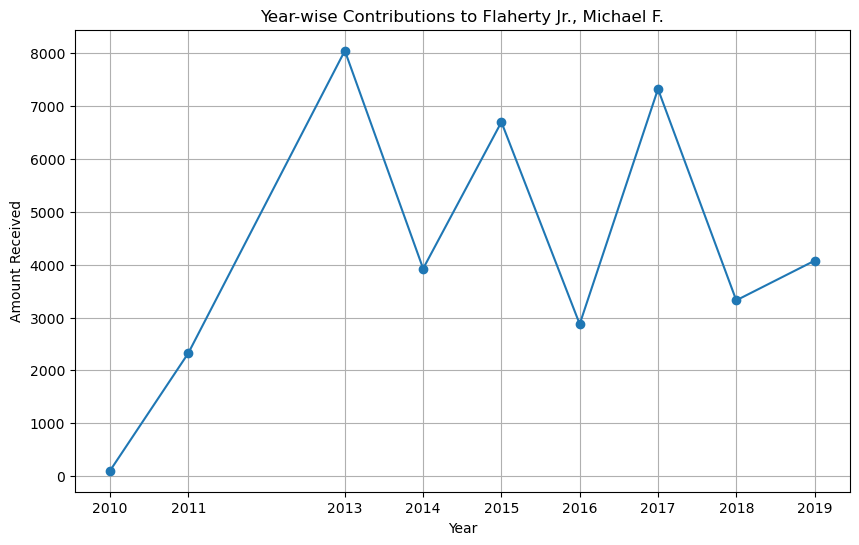

In [39]:

# Convert the 'Datetime' column to a datetime data type
df['Datetime'] = pd.to_datetime(df['Datetime'])
# Create a new 'year' column
df['year'] = df['Datetime'].dt.year

# Filter the DataFrame for contributions to the recipient 'Flaherty Jr., Michael F.'
recipient_name = 'Flaherty Jr., Michael F.'
recipient_contributions = df[df['Recipient'] == recipient_name]

# Group by the 'year' column and calculate the sum of the 'Amount' column
yearly_totals = recipient_contributions.groupby('year')['Amount'].sum().reset_index()

# Print a line chart of the amount received each year
plt.figure(figsize=(10, 6))
plt.plot(yearly_totals['year'], yearly_totals['Amount'], marker='o', linestyle='-')
plt.title(f'Year-wise Contributions to {recipient_name}')
plt.xlabel('Year')
plt.ylabel('Amount Received')
plt.grid(True)
plt.xticks(yearly_totals['year'])

# Count and print the number of contributions received that year
yearly_counts = recipient_contributions['year'].value_counts().reset_index()
yearly_counts.columns = ['Year', 'Contribution Count']
print(yearly_counts)

plt.show()


#### Finding the City from which Flaherty Jr., Michael F. recieved most of his Police contributions

In [40]:

# Filter the DataFrame for contributions to the recipient 'Flaherty Jr., Michael F.'
recipient_name = 'Flaherty Jr., Michael F.'
recipient_contributions = df[df['Recipient'] == recipient_name]
recipient_contributions['City'] = recipient_contributions['City'].str.lower()

# Group by the 'City' column and count the number of contributions
city_counts = recipient_contributions['City'].value_counts().reset_index()
city_counts.columns = ['City', 'Contribution Count']

# Print the top 10 cities
top_10_cities = city_counts.head(10)
print(top_10_cities)


           City  Contribution Count
0        boston                 106
1    dorchester                  24
2       hanover                  13
3  south boston                  12
4  west roxbury                  11
5       peabody                  11
6        quincy                  10
7   east boston                   5
8    marshfield                   5
9     braintree                   4


/var/folders/ry/qqr3x9d55rb8tlz6m6vx0jmc0000gn/T/ipykernel_28183/2089395051.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipient_contributions['City'] = recipient_contributions['City'].str.lower()
